In [140]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#read in the data
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
#merge dataframes
city_ride_df = pd.merge(city_df,ride_df,on="city", how="inner")
city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


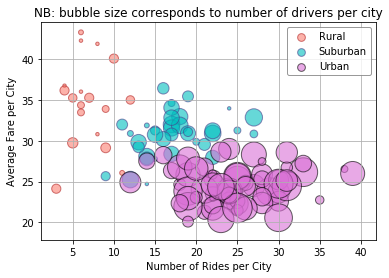

In [216]:
#group by city
city_ride = city_ride_df.groupby('city')

#get variables
num_rides = city_ride["ride_id"].nunique()
fare_per_city = city_ride["fare"].mean()
driver_per_city = city_ride.mean()['driver_count']

city_type = city_df.set_index("city")['type']



#create dataframe to create bubblechart through (this also allows us to sort by urban/rural/suburban)
city_info = pd.DataFrame({
    "Number of Rides": num_rides,
    "Average Fare": fare_per_city,
    "Number of Drivers": driver_per_city,
    "Type of City": city_type
})

#sort by urban/rural/suburban. We will create scatter each separately on the same bubblechart.
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']
#set colors for the chart
colors = {'Urban':'orchid', 'Suburban':'c', 'Rural':'salmon'}
#scatter
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*12, color = colors['Rural'], edgecolor = 'firebrick', label = 'Rural', alpha = .60)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*12, color = colors['Suburban'], edgecolor = 'darkslateblue', label = 'Suburban', alpha = .60)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*12, color = colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .60)
plt.title('NB: bubble size corresponds to number of drivers per city')


#label bubble chart and place key on chart
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.grid(which='major', axis='both')
key = plt.legend(frameon = True, edgecolor = 'grey')
key.legendHandles[0]._sizes = [60]
key.legendHandles[1]._sizes = [60]
key.legendHandles[2]._sizes = [60]


Text(0.5, 1.0, 'Fare proportions by type of city')

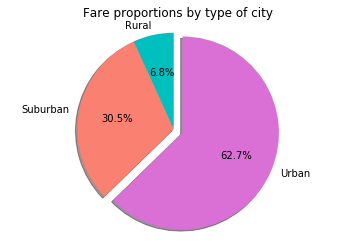

In [215]:
#total fares by city type
type_grouping = city_ride_df.groupby('type')
fare = type_grouping.sum()["fare"]
labels = fare.index
colors = {'salmon','c','orchid'}
explode = (0,0,.1)
plt.pie(fare,startangle=90,colors = colors, explode = explode,labels = labels,shadow=True,autopct="%1.1f%%",)
plt.axis("equal")
plt.title("Fare proportions by type of city")

Text(0.5, 1.0, 'Proportion of total rides by city type')

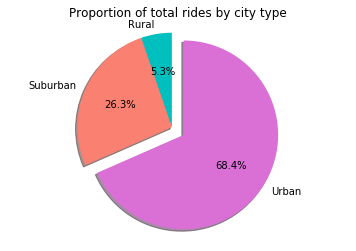

In [218]:
#total rides by city type
ride_grouping = city_ride_df.groupby('type')
rides = type_grouping.nunique()["ride_id"]
labels = rides.index
colors = {'salmon','c','orchid'}
explode = (0,0,.15)
plt.pie(rides,startangle=90,colors = colors, explode = explode,labels = labels,shadow=True,autopct="%1.1f%%",)
plt.axis("equal")
plt.title("Proportion of total rides by city type")

Text(0.5, 1.0, 'Proportion of total drivers by city type')

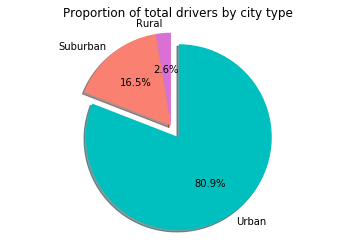

In [4]:
#total drivers
drivers = city_df.groupby('type').sum()["driver_count"]
labels = drivers.index
colors = {'salmon','c','orchid'}
explode = (0,0,.15)
plt.pie(drivers,startangle=90,colors = colors, explode = explode,labels = labels,shadow=True,autopct="%1.1f%%",)
plt.axis("equal")
plt.title("Proportion of total drivers by city type")

In [ ]:
city